# Import libraries

In [1]:
# Define data preprocessing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Define model library
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# Define ignore warning
import warnings
warnings.filterwarnings('ignore')

# Read the dataset

In [2]:
# Read diabetes dataset
df = pd.read_csv('../dataset/diabetes.csv')

# Filter only the important parameter
df = df[['Glucose', 'BloodPressure', 'BMI', 'Age', 'Outcome']]

In [3]:
# Null value data checking
df.isnull().sum()

Glucose          0
BloodPressure    0
BMI              0
Age              0
Outcome          0
dtype: int64

# Data preprocessing for ML preparation

In [4]:
numeric_columns = ['Glucose', 'BloodPressure','BMI', 'Age']

for column_name in numeric_columns:
    Q1 = np.percentile(df[column_name], 25, interpolation='midpoint')
    Q3 = np.percentile(df[column_name], 75, interpolation='midpoint')

    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR

    # Find outliers in the specified column
    outliers = df[(df[column_name] < low_lim) | (df[column_name] > up_lim)][column_name]

    # Replace outliers with the respective lower or upper limit
    df[column_name] = np.where(df[column_name] < low_lim, low_lim, df[column_name])
    df[column_name] = np.where(df[column_name] > up_lim, up_lim, df[column_name])

In [5]:
# Separate ML target column
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [6]:
# Determine train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

# Machine learning comparison

## Logistic regression

In [ ]:
# train the data with logistic regression
log_reg = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=200)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=200, solver='liblinear')

Accuracy: 76.55%
Accuracy: 78.57%


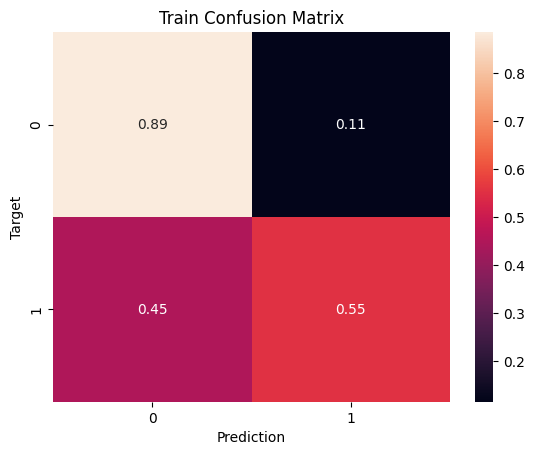

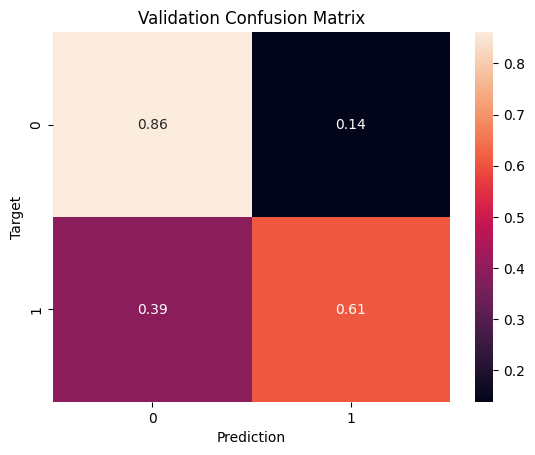

In [8]:
def predict_and_plot(model, inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    # Get the confusion matrix
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    
    return preds

# Predict and plot on the training data
train_preds = predict_and_plot(log_reg, X_train, y_train, 'Train')

# Predict and plot on the validation data
val_preds = predict_and_plot(log_reg, X_test, y_test, 'Validation')

## Support Vector Classifier

Training Accuracy: 0.7703583061889251
Validation Accuracy: 0.7467532467532467


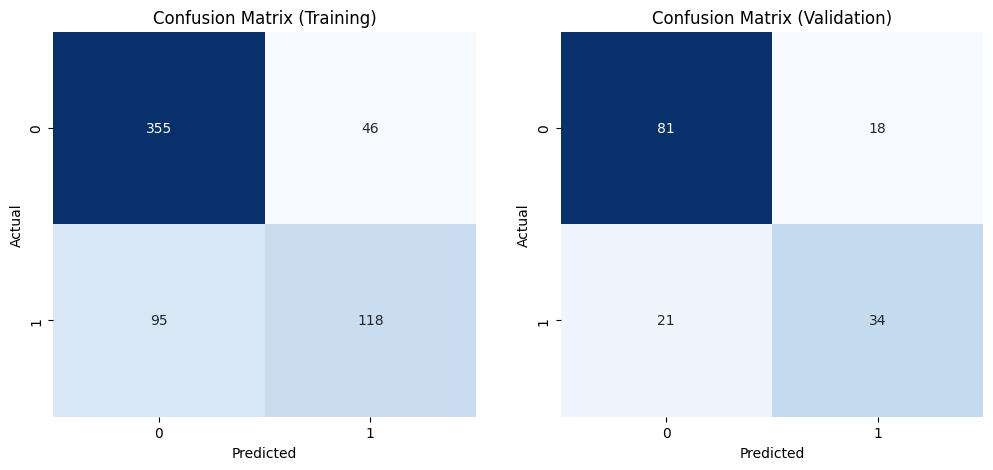

In [9]:
# Train with SVC
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define SVC model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict Y result
y_train_pred = svm_model.predict(X_train)
y_val_pred = svm_model.predict(X_val)

# Get the train and validation accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Get the confusion matrix
train_confusion = confusion_matrix(y_train, y_train_pred)
val_confusion = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()


## Decision tree

In [10]:
# Define Decision tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Get the train and validation accuracy
train_accuracy = decision_tree_model.score(X_train, y_train)
val_accuracy = decision_tree_model.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)


Training Accuracy: 1.0
Validation Accuracy: 0.948051948051948


Training Accuracy: 0.8110749185667753
Validation Accuracy: 0.7792207792207793


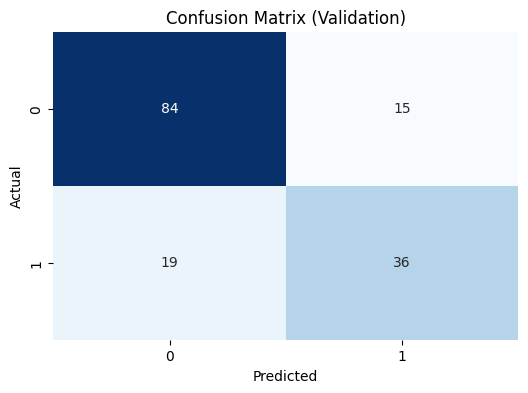

In [11]:
# Split the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Kneighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict Y result
y_train_pred = knn_model.predict(X_train)
y_val_pred = knn_model.predict(X_val)

# Get the train and validation accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Get the confusion matrix
confusion = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()


## Random forest

In [12]:
# Define Random forest model
model_2 = RandomForestClassifier(n_jobs =-1, random_state = 42)
model_2.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

Accuracy: 100.00%
Accuracy: 93.51%


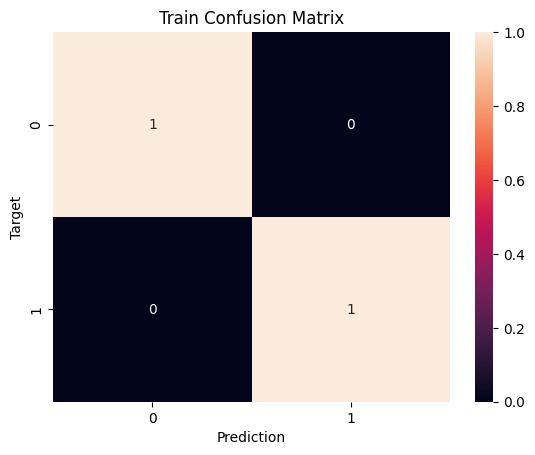

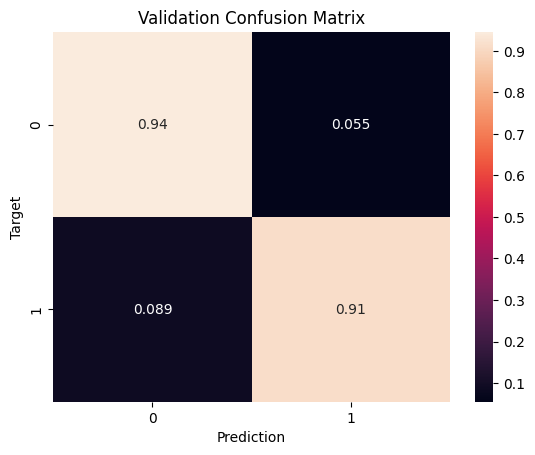

In [13]:
def predict_and_plot(model, inputs,targets, name = ''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy*100))
    
    # Get the confusion matrix
    cf = confusion_matrix(targets, preds, normalize = 'true')
    plt.figure()
    sns.heatmap(cf, annot = True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'. format(name))
    
    return preds

train_preds = predict_and_plot(model_2, X_train, y_train, 'Train')

# Predict and plot on the validation data
val_preds = predict_and_plot(model_2, X_test, y_test, 'Validation')


In [14]:
# Select and define hyperparameter param
param_grid = {
    'n_estimators': [10, 20, 30],  # Adjust the number of trees in the forest
    'max_depth': [10, 20, 30],  # Adjust the maximum depth of each tree
    'min_samples_split': [2, 5, 10, 15, 20],  # Adjust the minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4, 6, 8]  # Adjust the minimum samples required in a leaf node
}

# Define Random forest model
model = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Save up the best model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the model on the training and validation data
train_accuracy = best_model.score(X_train, y_train)
val_accuracy = best_model.score(X_test, y_test)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Training Accuracy: 0.8387622149837134
Validation Accuracy: 0.8701298701298701


# Conclusion

<div style="background-color:#F5F5F5;font-size:15px;font-family:Georgia;border-style:solid;border-color:#FF0000 ;border-width:3px;padding:10px;margin:1px;color:black;overflow:hidden">
  <b>The Best Model Evaluation: Random Forest Model with HyperParameter Tuning</b><br>
  Training Accuracy - 83.9% <br>
  Validation Accuracy - 87.0%
</div>

In [15]:
# Save the best model to a .pkl file
model_filename = "best_model.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)